# Guide to Using Python to Accompany Business Analytics by Jaggia et al.
## Chapter 6
##### Prepared by David G. Dobolyi at the University of Notre Dame

### Table of Contents

- [Example 6.1](#Example-6.1)
- [Example 6.2](#Example-6.2)
- [Example 6.9](#Example-6.9)
- [Example 6.10](#Example-6.10)

### Example 6.1

Using the data from Table 6.1 (below), estimate the linear regression model, $Earnings = \beta_0 + \beta_1Cost + \beta_2Grad + \beta_3Debt+\beta_4City + \epsilon$, where $Earnings$ is annual post-college earnings (in \\$), $Cost$ is the average annual cost (in \\$), $Grad$ is the graduation rate (in \%), $Debt$ is the percentage of students paying down debt (in \%), and $City$ assumes a value of 1 if the college is located in a city, 0 otherwise.

| Table 6.1 College Scorecard Data, May 2016 |
| --- |

| School$^a$ | Earnings | Cost | Grad | Debt | City |
| --- | --- | --- | --- | --- | --- |
| St. Ambrose Univ. | 44800 | 22920 | 62 | 88 | 1 |
| Albion College | 45100 | 23429 | 73 | 92 | 0 |
| ... | ... | ... | ... | ... | ... |
| Wittenburg Univ. | 42700 | 26616 | 64 | 90 | 1 |

- What is the sample regression equation?  
- Interpret the slope coefficients.  
- Predict annual post-college earnings if a college's average annual cost is \\$25,000, it's graduation rate is 60\%, its percentage of students paying down debt is 80\%, and it is located in a city.

#### Solution

In order to obtain the regression output using Python, we follow these steps.

**a.** Import the ***College*** data into a Pandas DataFrame (table) and label it myData.

In [1]:
import pandas as pd

myData = pd.read_excel('jaggia_ba_1e_ch06_Data_Files.xlsx', sheet_name = 'College')

myData.head()

School  Earnings   Cost  Grad  Debt  City
0                 St. Ambrose C (NC)     44800  22920    62    88     1
1        Albion College (Albion, MI)     45100  23429    73    92     0
2     Alfred University (Alfred, NY)     42300  19567    63    87     0
3  Allegheny College (Meadville, PA)     49200  25147    78    92     0
4        Beloit College (Beloit, WI)     37900  21979    78    93     1

**b.** Use **ols** and **fit** functions in statsmodels to create a linear model, which we label Multiple. Note that we use the '+' sign to add predictor variables, even if we believe that a negative relationship may exist between the response variable and the predictor variables. You will not see output after you implement this step:

In [2]:
import statsmodels.formula.api as smf

Multiple = smf.ols(formula = 'Earnings ~ Cost + Grad + Debt + City', data = myData).fit()

**c.** Use the **summary** method to view the summary regression output.

In [3]:
Multiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Earnings   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     20.87
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           7.56e-13
Time:                        17:24:52   Log-Likelihood:                -1164.1
No. Observations:                 116   AIC:                             2338.
Df Residuals:                     111   BIC:                             2352.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       1e+04   7634.334      1.311      0.193   -5122.976    2.51e+04
Cost           0.4349      0.111      3.917      0.000       0.215       0.655
Grad         178.0989     69.194      2.574      0.011      40.986     315.211
Debt         141.4783    117.212      1.207      0.230     -90.785     373.742
City        2526.7888   1103.403      2.290      0.024     340.323    4713.255
==============================================================================
Omnibus:                       14.990   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.512
Skew:                           0.669   Prob(JB):                     3.51e-05
Kurtosis:                       4.566   Cond. No.                     3.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Alternatively, use the experimental **summary2** method (which may allow for additional control over how values are displayed):

In [4]:
Multiple.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.409     
Dependent Variable: Earnings         AIC:                2338.2548 
Date:               2020-07-15 17:24 BIC:                2352.0228 
No. Observations:   116              Log-Likelihood:     -1164.1   
Df Model:           4                F-statistic:        20.87     
Df Residuals:       111              Prob (F-statistic): 7.56e-13  
R-squared:          0.429            Scale:              3.1875e+07
-------------------------------------------------------------------
             Coef.     Std.Err.   t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept  10004.9665 7634.3338 1.3105 0.1927 -5122.9757 25132.9086
Cost           0.4349    0.1110 3.9172 0.0002     0.2149     0.6549
Grad         178.0989   69.1940 2.5739 0.0114    40.9864   315.2114
Debt         141.4783  117.2120 1.2070 0.2300   -90.7851   373.7417
City        2526.7888 1103.4026 2.2900 0.0239   340.3229  4713.2548
-------------------------------------------------------------------
Omnibus:              14.990        Durbin-Watson:           1.973 
Prob(Omnibus):        0.001         Jarque-Bera (JB):        20.512
Skew:                 0.669         Prob(JB):                0.000 
Kurtosis:             4.566         Condition No.:           376049
===================================================================
* The condition number is large (4e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

As expected, these values are identical to the ones obtained using Excel and R.

**d.** For the interpretation of the coefficients, see the in-text explanation.

**e.** We use the **predict** method to make a prediction by supplying relevant predictor values in a Pandas DataFrame:

In [5]:
Multiple.predict(pd.DataFrame({
    'Cost': [25000], 
    'Grad': [60],
    'Debt': [80],
    'City': [1]
    }))

0    45408.799089
dtype: float64

### Example 6.2

A government researcher is analyzing the relationship between retail sales (Sales in \\$ millions) and the gross national product (GNP in \\$ billions). He also wonders whether there are significant differences in retail sales related to the quarters of the year. He collects 10 years of quarterly data and creates dummy variables for the quarters. A portion is shown in Table 6.3 below.

| Table 6.3 Data for Example 6.2 |
| --- |

| Year | Quarter | Sales | GNP |
| --- | --- | --- | --- |
| 2007 | 1 | 921266 | 14301.854 |
| 2007 | 2 | 1013371 | 14512.945 |
| ... | ... | ... | ... |
| 2016 | 4 | 1299699 | 19134.463 |

- Estimate the model $y = \beta_0 + \beta_1x + \beta_2d_1 + \beta_3d_2 + \beta_4d_3 + \epsilon$, where $y$ and $x$ represent retail sales and GNP, respectively; $d_1$ equals 1 if quarter 1, 0 otherwise; $d_2$ equals 1 if quarter 2, 0 otherwise; and d_3 equals 1 if quarter 3, 0.  
- Interpret the slope coefficient for quarter 1.  
- What are predicted sales in quarter 2 if GNP is \\$18,000 (in billions)? For the same value of GNP, what are predicted sales in quarter 4?

#### Solution

In order to obtain the regression output using Python, we follow these steps.

**a.** Import the ***Retail*** data into a Pandas DataFrame (table) and label it myData.

In [6]:
import pandas as pd

myData = pd.read_excel('jaggia_ba_1e_ch06_Data_Files.xlsx', sheet_name = 'Retail')

myData.head()

Year  Quarter    Sales        GNP
0  2007        1   921266  14301.854
1  2007        2  1013371  14512.945
2  2007        3  1000151  14717.814
3  2007        4  1060394  14880.255
4  2008        1   950268  14848.718

**b.** Use the **ols** and **fit** functions in statsmodels to conduct the regression and store it in a variable named ModRetail.

In [7]:
import statsmodels.formula.api as smf

ModRetail = smf.ols(formula = 'Sales ~ GNP + C(Quarter, Treatment(reference = 4))', data = myData).fit()

**c.** Use the **summary2** function in statsmodels to show the regression output:

In [8]:
ModRetail.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Ordinary least squares
=======================================================================================================
Model:                          OLS                          Adj. R-squared:                 0.929     
Dependent Variable:             Sales                        AIC:                            943.7765  
Date:                           2020-07-15 17:24             BIC:                            952.2209  
No. Observations:               40                           Log-Likelihood:                 -466.89   
Df Model:                       4                            F-statistic:                    128.7     
Df Residuals:                   35                           Prob (F-statistic):             2.02e-20  
R-squared:                      0.936                        Scale:                          9.2017e+08
-------------------------------------------------------------------------------------------------------
                                           Coef.      Std.Err.     t    P>|t|     [0.025       0.975]  
-------------------------------------------------------------------------------------------------------
Intercept                                 47095.6859 53963.3350  0.8727 0.3888  -62455.7083 156647.0802
C(Quarter, Treatment(reference=4))[T.1] -108765.2580 13638.1967 -7.9750 0.0000 -136452.2693 -81078.2467
C(Quarter, Treatment(reference=4))[T.2]  -30486.2947 13593.5983 -2.2427 0.0314  -58082.7664  -2889.8231
C(Quarter, Treatment(reference=4))[T.3]  -48805.0461 13570.2660 -3.5965 0.0010  -76354.1507 -21255.9416
GNP                                          65.0548     3.2151 20.2339 0.0000      58.5277     71.5818
-------------------------------------------------------------------------------------------------------
Omnibus:                          0.777                     Durbin-Watson:                       0.360 
Prob(Omnibus):                    0.678                     Jarque-Bera (JB):                    0.752 
Skew:                             -0.019                    Prob(JB):                            0.687 
Kurtosis:                         2.329                     Condition No.:                       185046
=======================================================================================================
* The condition number is large (2e+05). This might indicate             strong multicollinearity or
other numerical problems.
"""

**c.** All else equal, retail sales in quarter 1 are expected to be approximately \\$108,765 million less than sales in quarter 4.

**d.** Once again, we use the **predict** method to make a prediction by supplying relevant predictor values in a Pandas DataFrame and then round the result:

In [9]:
RetailPredictions = ModRetail.predict(pd.DataFrame({
    'GNP': [18000, 18000], 
    'Quarter': [2, 4]
    }))

round(RetailPredictions, 2)

0    1187594.98
1    1218081.28
dtype: float64

### Example 6.9

Consider a simple regression model that relates monthly sales (Sales in \\$1,000s) from a chain of convenience stores with the square footage (Sqft) of the store. A portion of the data used for the analysis is shown in Table 6.15 below. Estimate the model and use a residual plot to determine if the observations have a changing variability.

| Table 6.15 Sales and Square Footage of Convenience Stores |
| --- |

| Sales | Sqft |
| --- | --- |
| 140 | 1810 |
| 160 | 2500 |
| ... | ... |
| 110 | 1470 |

#### Solution

In order to obtain the output using Python, we follow these steps.

**a.** Import the ***Convenience_Stores*** data into a Pandas DataFrame (table) and label it myData.

In [10]:
import pandas as pd

myData = pd.read_excel('jaggia_ba_1e_ch06_Data_Files.xlsx', sheet_name = 'Convenience_Stores')

myData.head()

Sales  Sqft
0    140  1810
1    160  2500
2     80  1010
3    180  2170
4    140  2310

**b.** Use the **ols** and **fit** functions in statsmodels to conduct the regression and store it in a variable named Simple.

In [11]:
import statsmodels.formula.api as smf

Simple = smf.ols(formula = "Sales ~ Sqft", data = myData).fit()

**c.** Use the **summary** function to see the non-robust regression output (i.e., note the Covariance Type in the output below).

In [12]:
Simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     109.0
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           1.02e-12
Time:                        17:24:53   Log-Likelihood:                -166.39
No. Observations:                  40   AIC:                             336.8
Df Residuals:                      38   BIC:                             340.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.0795     10.476      2.108      0.042       0.871      43.288
Sqft           0.0591      0.006     10.439      0.000       0.048       0.071
==============================================================================
Omnibus:                        7.975   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                8.046
Skew:                           0.654   Prob(JB):                       0.0179
Kurtosis:                       4.765   Cond. No.                     7.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**d.** Use the **resid** attribute to obtain the residuals from the simple linear regression model, labeled Simple_Residuals. Enter:

In [13]:
Simple_Residuals = Simple.resid

**e.** Use seaborn's **scatterplot** along with matplotlib to create a scatterplot of the residuals against the predictor variable, sqft. The key functions used in matplotlib include: **figure**, which we use the adjust the figure size (i.e., *figsize*); **axhline**, which we use to add a horizontal line at 0; and **show** to render the plot. We also use the **ylabel** function to adjust the y-axis label. Enter:

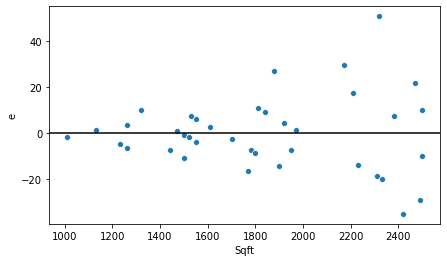

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (7, 4))
plt.axhline(y = 0, color = 'black')

ax = sns.scatterplot(
    x = myData.Sqft,
    y = Simple_Residuals)

plt.ylabel('e')

plt.show()

Alternatively, we can use statsmodels to create this figure directly (i.e., see the top-right subfigure):

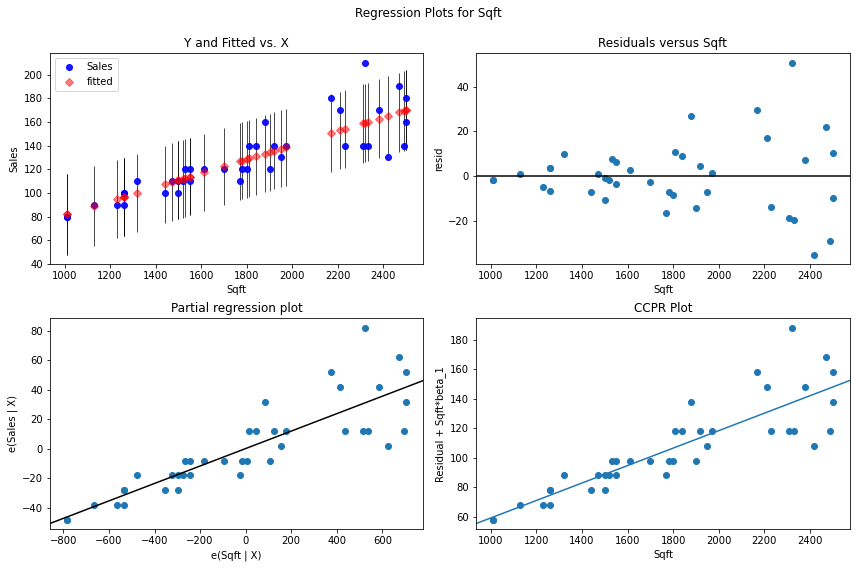

In [15]:
import statsmodels.api as sm

fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(Simple, "Sqft", fig = fig)

**f.** Use the **get_robustcov_results** and **summary** functions in statsmodels to calculate robust standard errors for the OLS estimators. By setting the argument *cov_type* to `HC1`, we are asking Python to apply a widely used formula for calculating robust standard errors (other designations within *cov_type* are available). Enter:

In [16]:
Simple_Robust = Simple.get_robustcov_results(cov_type = 'HC1')

Simple_Robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     84.31
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           3.46e-11
Time:                        17:24:55   Log-Likelihood:                -166.39
No. Observations:                  40   AIC:                             336.8
Df Residuals:                      38   BIC:                             340.2
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.0795      9.563      2.309      0.026       2.720      41.439
Sqft           0.0591      0.006      9.182      0.000       0.046       0.072
==============================================================================
Omnibus:                        7.975   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                8.046
Skew:                           0.654   Prob(JB):                       0.0179
Kurtosis:                       4.765   Cond. No.                     7.70e+03
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 7.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As shown, the corrected standard errors for the intercept and Sqft are 9.563 and 0.006, respectively:

In [17]:
Simple_Robust.HC1_se

array([9.56301625e+00, 6.44154021e-03])

### Example 6.10

Consider $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \epsilon$, where $y$ represents sales (in \\$1,000s) at a sushi restaurant and $x_1$ and $x_2$ represent advertising costs (in \\$) and the unemployment rate (in \%), respectively. A portion of monthly data from January 2018 to May 2019 is given in Table 6.16 below. Inspect the behavior of the residuals to comment on serial correlation.

| Table 6.16 Sales, Advertising Costs, and Unemployment Data |
| --- |

| Month | Year | Sales | AdsCost | Unemp |
| --- | --- | --- | --- | --- |
| January | 2018 | 27.0 | 550 | 4.6 |
| February | 2018 | 24.2 | 425 | 4.3 |
| ... | ... | ... | ... | ... |
| May | 2019 | 27.4 | 550 | 9.1 |

#### Solution

In order to obtain the output using Python, we follow these steps.

**a.** Import the ***Sushi_Restaurant*** data into a Pandas DataFrame (table) and label it myData.

In [18]:
import pandas as pd

myData = pd.read_excel('jaggia_ba_1e_ch06_Data_Files.xlsx', sheet_name = 'Sushi_Restaurant')

myData.columns = myData.columns.str.strip() # note: fixes trailing space in Sales column in Excel data file

myData.head()

Month  Year  Sales  AdsCost  Unemp
0  January   2018   27.0      550    4.6
1  February  2018   24.2      425    4.3
2     March  2018   25.6      450    4.6
3     April  2018   28.5      625    4.3
4       May  2018   30.8      650    4.8

**b.** Use the **ols** and **fit** functions in statsmodels to conduct the regression and store it in a variable named Multiple.

In [19]:
import statsmodels.formula.api as smf

Multiple = smf.ols(formula = 'Sales ~ AdsCost + Unemp', data = myData).fit()

**c.** Use the **summary** function to see the non-robust regression output (i.e., note the Covariance Type in the output below).

In [20]:
Multiple.summary()

C:\Miniconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     8.760
Date:                Wed, 15 Jul 2020   Prob (F-statistic):            0.00341
Time:                        17:24:55   Log-Likelihood:                -34.560
No. Observations:                  17   AIC:                             75.12
Df Residuals:                      14   BIC:                             77.62
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.5060      3.982      4.397      0.001       8.966      26.046
AdsCost        0.0266      0.007      3.932      0.002       0.012       0.041
Unemp         -0.6879      0.300     -2.295      0.038      -1.331      -0.045
==============================================================================
Omnibus:                        1.231   Durbin-Watson:                   0.730
Prob(Omnibus):                  0.540   Jarque-Bera (JB):                0.910
Skew:                           0.275   Prob(JB):                        0.634
Kurtosis:                       2.009   Cond. No.                     4.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**d.** Use the **resid** attribute to obtain the residuals from the multiple linear regression model, labeled Multiple_Residuals. Enter:

In [21]:
Multiple_Residuals = Multiple.resid

**e.** First use the **range** function to create a time variable, labeled as T, that has the same number of observations as Multiple_Residuals. To determine the number of observations in Multiple Residuals we use the **len** function. Note that because the stop of the **range** function is not inclusive, we add one to the number of observations to achieve our desired result:

In [22]:
T = range(1, len(Multiple_Residuals) + 1)

Next we use seaborn and matplotlib to build our plot similar to [Example 6.9](#Example-6.10) part e above:

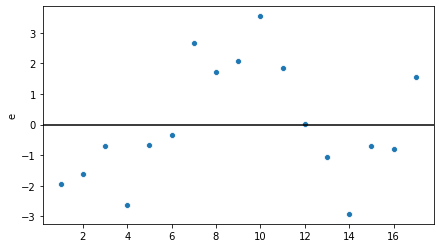

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (7, 4))
plt.axhline(y = 0, color = 'black')

p1 = sns.scatterplot(
    x = T,
    y = Multiple_Residuals)

plt.ylabel('e')

plt.show()

The scatterplot that Python returns should resemble Figure 6.11.

Use the **cov_hac** function in statsmodels to calculate robust standard errors for the OLS estimators. By setting the argument *use_correction* to `False`, we are asking for the most basic correction (other options are available). Enter:

In [24]:
from statsmodels.stats.sandwich_covariance import cov_hac

cov_hac(Multiple, use_correction = False)

array([[ 1.81023047e+01, -2.34222803e-02, -5.59266685e-01],
       [-2.34222803e-02,  4.05687684e-05, -9.81991284e-05],
       [-5.59266685e-01, -9.81991284e-05,  9.03649921e-02]])

The output represents the variance-covariance matrix, where the diagonal elements contain the variances and the off-diagonal elements contain the covariances of the OLS estimators. Because we are interested in the standard errors, we simply take the square roots of the diagonal values of the matrix (i.e., from top-left to bottom-right) using NumPy's **sqrt** and **diag** functions, respectively. In order to find the standard errors, labeled as Multiple_SE, enter:

In [25]:
import numpy as np

Multiple_SE = np.sqrt(np.diag(cov_hac(Multiple, use_correction = False)))

Multiple_SE

array([4.25468033, 0.00636936, 0.3006077 ])

Alternatively, we could use the **get_robustcov_results** method directly to return the robust standard errors (i.e., see the coefficients table in the output below):

In [26]:
Multiple.get_robustcov_results(cov_type = 'HAC', maxlags = None, use_correction=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     10.85
Date:                Wed, 15 Jul 2020   Prob (F-statistic):            0.00143
Time:                        17:24:55   Log-Likelihood:                -34.560
No. Observations:                  17   AIC:                             75.12
Df Residuals:                      14   BIC:                             77.62
Df Model:                           2                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.5060      4.255      4.115      0.001       8.381      26.631
AdsCost        0.0266      0.006      4.169      0.001       0.013       0.040
Unemp         -0.6879      0.301     -2.288      0.038      -1.333      -0.043
==============================================================================
Omnibus:                        1.231   Durbin-Watson:                   0.730
Prob(Omnibus):                  0.540   Jarque-Bera (JB):                0.910
Skew:                           0.275   Prob(JB):                        0.634
Kurtosis:                       2.009   Cond. No.                     4.74e+03
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using None lags and without small sample correction
[2] The condition number is large, 4.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using either method, the corrected standard errors for the intercept, AdsCost, and Unemp are approximately 4.2547, 0.0064, and 0.3006, respectively:

In [27]:
np.round(Multiple_SE, 4)

array([4.2547, 0.0064, 0.3006])

Note these values may differ slightly depending on the type of correction used (e.g., depending on whether corrections are used in Python, *prewhite* is used in R or not, etc.).